In [1]:
from train_tf import *
from tensorflow.keras.callbacks import TensorBoard
from parameters import *
import socket
import tensorflow as tf

import datetime
import os

## Results

In [1]:
from data import *
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import swifter
from tqdm import tqdm
import regex as re

C:\Users\nxcle\anaconda3\envs\spartan\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
args = didi.parse()
par = Params()
data = Data(par)

# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/5e8b285d69edeee2833f1f2aa4d81ef00f787ed5188fcf557a54d04ad73af547/OPT_125m/NEWS_SINGLE/' # No Normalisation, Ret
# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/23c308fffeb08a56e3eb4b0717303816005bafc70a823f1a45b92c2c9027ab88/OPT_125m/NEWS_SINGLE/' # No Normalisation, Abret
# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/d7cc8fc49ceec47bf5ac309008d70a2ed2e1e7df992a46af4c24ecdaf9a71c85/OPT_125m/NEWS_SINGLE/' # Normalisation, Ret
# load_dir = '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/94b11dd4cdedaa2336935ea8d1c0320df74fdba113fa2ffbae5c448a91abf9ac/OPT_125m/NEWS_SINGLE/' # large model 2019
#load_dir = '/data/gpfs/projects/punim2039/EightK/res/temp/vec_pred/8f0a05c1bb38a954d7defbe0ae7e0fb3725f1c97236de7c82f8f002924b05c2e/OPT_125m/NEWS_SINGLE/' # large model 2017

load_dir = "/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/"
model_outputs = [os.path.join(load_dir, f) for f in os.listdir(load_dir) if re.match(r'\d+.p$', f)]
model_outputs

['/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2012.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2013.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2014.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2015.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2016.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2017.p',
 '/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2018.p']

In [3]:
crsp = data.load_crsp_daily()
crsp_sorted = crsp.sort_values(by=['permno', 'date'])
crsp_sorted.head(10)

,permno,date,ticker,prc,ret,bid,ask,shrout
0,10001,1993-01-04,GFGC,14.50,0.035714,14.00,14.50,1080.0
1,10001,1993-01-05,GFGC,-14.25,-0.017241,14.00,14.50,1080.0
2,10001,1993-01-06,GFGC,-14.25,0.000000,14.00,14.50,1080.0
3,10001,1993-01-07,GFGC,14.50,0.017544,14.00,14.50,1080.0
4,10001,1993-01-08,GFGC,14.50,0.000000,14.00,14.50,1080.0
5,10001,1993-01-11,GFGC,14.50,0.000000,14.00,14.50,1080.0
6,10001,1993-01-12,GFGC,-14.25,-0.017241,14.00,14.50,1080.0
7,10001,1993-01-13,GFGC,13.75,-0.035088,13.75,14.25,1080.0
8,10001,1993-01-14,GFGC,13.75,0.000000,13.75,14.25,1080.0
9,10001,1993-01-15,GFGC,-14.00,0.018182,13.75,14.25,1080.0


In [4]:
# read df from pickle
#date should be in datetime64[ns]
df = pd.read_pickle(model_outputs[0]).rename(columns={'ticker':'permno'})
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'date': 'date_news'}, inplace=True)
df

,id,date_news,permno,y_true,y_pred,y_pred_prb,accuracy
0,20120103-001514000-nL1E8C3003-1-1,2012-01-03,23819,0,1,0.507723,False
1,20120103-003939000-nL1E8C3003-1-2,2012-01-03,23819,0,1,0.513564,False
2,20120103-043854000-nL1E8C306Z-1-2,2012-01-03,23819,0,0,0.476440,True
3,20120103-085633000-nRTV359836-1-2,2012-01-03,23819,0,1,0.513852,False
4,20120103-091333000-nRTV359836-1-2,2012-01-03,23819,0,1,0.513852,False
...,...,...,...,...,...,...,...
430448,20120515-120124000-nPnSF07092-1-2,2012-05-15,28804,0,1,0.516762,False
430449,20120515-120125000-nPnSF07150-1-2,2012-05-15,85576,1,1,0.501940,True
430450,20120515-120409000-nPnCL07067-1-2,2012-05-15,78876,1,0,0.490621,False
430451,20120515-120501000-nBw155385a-1-2,2012-05-15,92121,0,1,0.517236,False


In [5]:
"""
Can change the year.
"""
model_outputs[0]

'/data/gpfs/projects/punim2119/EightK/res/temp/vec_pred/last_large_full/OPT_125m/NEWS_SINGLE/2012.p'

In [6]:
df['accuracy'].mean()

0.5183469507704674

In [7]:
"""
Run if only running all years available.
"""
# Combine all years

dfs = []
for mo in model_outputs:
    df = pd.read_pickle(mo).rename(columns={'ticker':'permno'})
    df['date'] = pd.to_datetime(df['date'])
    df.rename(columns={'date': 'date_news'}, inplace=True)
    dfs.append(df)

df = pd.concat(dfs)

In [8]:
df

,id,date_news,permno,y_true,y_pred,y_pred_prb,accuracy
0,20120103-001514000-nL1E8C3003-1-1,2012-01-03,23819,0,1,0.507723,False
1,20120103-003939000-nL1E8C3003-1-2,2012-01-03,23819,0,1,0.513564,False
2,20120103-043854000-nL1E8C306Z-1-2,2012-01-03,23819,0,0,0.476440,True
3,20120103-085633000-nRTV359836-1-2,2012-01-03,23819,0,1,0.513852,False
4,20120103-091333000-nRTV359836-1-2,2012-01-03,23819,0,1,0.513852,False
...,...,...,...,...,...,...,...
579549,GNX25Z3vm_1809282/C2MYyYoGWfz6B13081np1Ko5zpr8...,2018-09-28,14707,1,1,0.529857,True
579550,GNX1Q3B3d_1809282DIJ2huMTjdb3r3SYnnjYOmmqeNLgQ...,2018-09-28,13527,1,1,0.525658,True
579551,GNX1csn08_1809282EaSxDzB8DftmQSScKaQma2xQ3Phby...,2018-09-28,12623,1,1,0.526154,True
579552,GNX1Kv7vX_1809282Jz2Gupn9embV6CtoKXb0Q32JKHGC7...,2018-09-28,87267,0,1,0.527194,False


In [9]:
"""
Index the crsp data to run faster for the next cell.
"""
n_days_ahead = 1

print('Creating permno mapping')
crsp_grouped = crsp_sorted.groupby('permno')
permno_mapping = {}
permno_date_to_index_mapping = {}  # New mapping for date to index

for permno, group in tqdm(crsp_grouped):
    records = group[['date', 'prc', 'ret', 'bid', 'ask', 'shrout']].to_records(index=False)
    permno_mapping[permno] = records
    permno_date_to_index_mapping[permno] = {date: idx for idx, date in enumerate(group['date'])}


Creating permno mapping


100%|██████████| 14658/14658 [01:11<00:00, 205.52it/s]


In [10]:
"""
Gets the next day return for each news article.
"""
# Function to perform binary search and get nth day return
def get_nth_day_return(row):
    permno = row['permno']
    date_news = row['date_news']

    trading_days = permno_mapping.get(permno, None)
    date_to_index = permno_date_to_index_mapping.get(permno, {})

    if trading_days is not None and date_news in date_to_index:
        start_index = date_to_index[date_news]
        nth_index = start_index + n_days_ahead

        if nth_index < len(trading_days):
            nth_day_data = trading_days[nth_index]
            return pd.Series({
                'date': nth_day_data.date,
                'prc': nth_day_data.prc,
                'ret': nth_day_data.ret,
                'bid': nth_day_data.bid,
                'ask': nth_day_data.ask,
                'shrout': nth_day_data.shrout
            })
    # Return default values if conditions are not met
    return pd.Series({
        'date': pd.NaT,
        'prc': None,
        'ret': None,
        'bid': None,
        'ask': None,
        'shrout': None
    })

tqdm.pandas(desc="Processing rows")
additional_columns = df.progress_apply(get_nth_day_return, axis=1)
for col in ['prc', 'ret', 'bid', 'ask', 'shrout']:
    additional_columns[col] = pd.to_numeric(additional_columns[col], errors='coerce')
df_merged = pd.concat([df, additional_columns], axis=1)
df_merged.rename(columns={'date': 'date_trade'}, inplace=True)
df_merged

Processing rows: 100%|██████████| 3368524/3368524 [32:16<00:00, 1739.38it/s] 


,id,date_news,permno,y_true,y_pred,y_pred_prb,accuracy,date_trade,prc,ret,bid,ask,shrout
0,20120103-001514000-nL1E8C3003-1-1,2012-01-03,23819,0,1,0.507723,False,2012-01-04,35.12,0.028404,35.11000,35.12000,920165.0
1,20120103-003939000-nL1E8C3003-1-2,2012-01-03,23819,0,1,0.513564,False,2012-01-04,35.12,0.028404,35.11000,35.12000,920165.0
2,20120103-043854000-nL1E8C306Z-1-2,2012-01-03,23819,0,0,0.476440,True,2012-01-04,35.12,0.028404,35.11000,35.12000,920165.0
3,20120103-085633000-nRTV359836-1-2,2012-01-03,23819,0,1,0.513852,False,2012-01-04,35.12,0.028404,35.11000,35.12000,920165.0
4,20120103-091333000-nRTV359836-1-2,2012-01-03,23819,0,1,0.513852,False,2012-01-04,35.12,0.028404,35.11000,35.12000,920165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579549,GNX25Z3vm_1809282/C2MYyYoGWfz6B13081np1Ko5zpr8...,2018-09-28,14707,1,1,0.529857,True,2018-10-01,18.80,0.056180,18.81000,18.82000,45540.0
579550,GNX1Q3B3d_1809282DIJ2huMTjdb3r3SYnnjYOmmqeNLgQ...,2018-09-28,13527,1,1,0.525658,True,2018-10-01,128.13,-0.014839,128.13000,128.14000,55727.0
579551,GNX1csn08_1809282EaSxDzB8DftmQSScKaQma2xQ3Phby...,2018-09-28,12623,1,1,0.526154,True,2018-10-01,257.38,0.005077,257.29999,257.31000,43318.0
579552,GNX1Kv7vX_1809282Jz2Gupn9embV6CtoKXb0Q32JKHGC7...,2018-09-28,87267,0,1,0.527194,False,2018-10-01,473.47,0.004540,473.47000,473.51001,159584.0


In [12]:
"""
Grouping by stock and date.
y_pred_prb: predicted prob that stock goes up.
ret and y_true, prc not affected with mean().
"""
df_grouped =df_merged.groupby(['permno','date_news'])[['ret','y_pred_prb','y_true', 'prc']].mean().reset_index()
df_grouped['year'] = df_grouped['date_news'].dt.year
print(df_grouped.groupby('year')['y_pred_prb'].mean())
df_grouped['tresh'] = df_grouped.groupby('year')['y_pred_prb'].transform('mean')

year
2012    0.498885
2013    0.513485
2014    0.537149
2015    0.549821
2016    0.548492
2017    0.563309
2018    0.553939
Name: y_pred_prb, dtype: float32


In [65]:
"""
If stock prob sentiment is above mean of that year.
"""
#df_grouped['pred'] = df_grouped['y_pred_prb']>df_grouped['tresh']
df_grouped['pred'] = df_grouped['y_pred_prb']>0.5
df_grouped['accuracy']=df_grouped['pred']==df_grouped['y_true']
df_grouped['accuracy'].mean()

0.5344896906630451

In [66]:
"""
Once you average sentiment within stocks-trading day, you gain accuracy.
If a news is novel or important, may be reported by multiple news outlets, hence, the final sentiment is "weighted towards important news".
"""
df_merged['accuracy'].mean()

0.5307781687172186

<Axes: xlabel='date_news'>

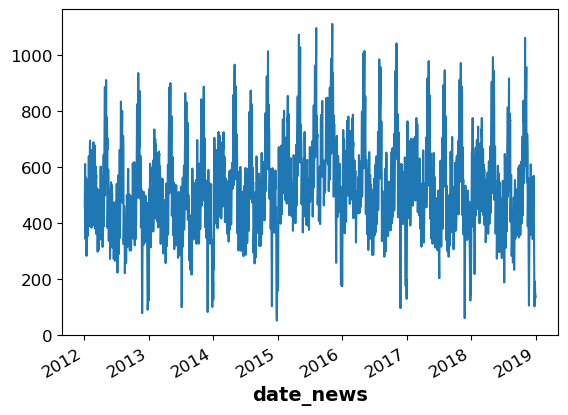

In [67]:
"""
For each date of news, how many articles.
"""
df_grouped.groupby('date_news')['permno'].count().plot()

In [69]:
"""
Normalize signals
"""
#df_grouped['norm_y_pred_prb']
df_grouped['y_pred_prb'].median()

0.5295166969299316

In [54]:
"""
Create a column for the ranking of sentiment.
"""
df_grouped['pct']=df_grouped.groupby('date_news')['y_pred_prb'].rank(pct=True)

<Axes: >

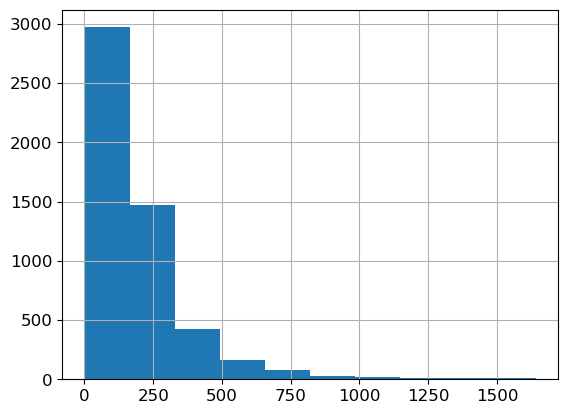

In [77]:
df_grouped[df_grouped['permno'] == 10025]
df_grouped.groupby('permno')['date_news'].count().hist()

In [56]:
df_grouped_50 = (df_grouped.groupby('permno')['date_news'].count() > 1000).reset_index()
df_above_50 = df_grouped[df_grouped['permno'].isin(df_grouped_50[df_grouped_50['date_news']]['permno'])]

df_above_50

,permno,date_news,ret,y_pred_prb,y_true,prc,year,tresh,pred,accuracy,pct,pos
577,10104,2012-01-06,0.005941,0.510200,1.0,27.03000,2012,0.498885,False,False,0.740525,0
578,10104,2012-01-09,-0.002220,0.491242,1.0,26.97000,2012,0.498885,False,False,0.360568,0
579,10104,2012-01-11,0.010413,0.514600,0.0,27.17000,2012,0.498885,False,True,0.857482,1
580,10104,2012-01-12,0.006257,0.286747,1.0,27.34000,2012,0.498885,False,False,0.004608,-1
581,10104,2012-01-17,0.024584,0.488648,1.0,28.34000,2012,0.498885,False,False,0.326126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
967516,93436,2018-12-24,0.103930,0.363176,0.0,326.09000,2018,0.553939,False,True,0.079208,-1
967517,93436,2018-12-26,-0.030544,0.631070,1.0,316.13000,2018,0.553939,True,True,0.881944,1
967518,93436,2018-12-27,0.056116,0.489170,0.0,333.87000,2018,0.553939,False,True,0.100000,-1
967519,93436,2018-12-28,-0.003205,0.636479,1.0,332.79999,2018,0.553939,True,True,0.893333,1


In [57]:
"""
Run this only for news momentum returns
"""
def process_group(group):
    group['momentum'] = group['y_pred_prb'].diff()  # Calculate the difference in 'y_pred_prb'
    return group

# Group by 'permno', apply the function, and concatenate the results
df_result = pd.concat([process_group(group) for _, group in df_above_50.groupby('permno')])
df_result = df_result.dropna()
df_result['pct']=df_result.groupby('date_news')['momentum'].rank(pct=True)
df_result

,permno,date_news,ret,y_pred_prb,y_true,prc,year,tresh,pred,accuracy,pct,pos,momentum
578,10104,2012-01-09,-0.002220,0.491242,1.0,26.97000,2012,0.498885,False,False,0.128205,0,-0.018959
579,10104,2012-01-11,0.010413,0.514600,0.0,27.17000,2012,0.498885,False,True,0.878049,1,0.023358
580,10104,2012-01-12,0.006257,0.286747,1.0,27.34000,2012,0.498885,False,False,0.025641,-1,-0.227852
581,10104,2012-01-17,0.024584,0.488648,1.0,28.34000,2012,0.498885,False,False,1.000000,0,0.201900
582,10104,2012-01-18,0.007763,0.486440,1.0,28.56000,2012,0.498885,False,False,0.484848,0,-0.002208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967516,93436,2018-12-24,0.103930,0.363176,0.0,326.09000,2018,0.553939,False,True,0.083333,-1,-0.242206
967517,93436,2018-12-26,-0.030544,0.631070,1.0,316.13000,2018,0.553939,True,True,1.000000,1,0.267893
967518,93436,2018-12-27,0.056116,0.489170,0.0,333.87000,2018,0.553939,False,True,0.100000,-1,-0.141900
967519,93436,2018-12-28,-0.003205,0.636479,1.0,332.79999,2018,0.553939,True,True,0.791667,1,0.147310


In [58]:
# Convert 'date_news' to datetime
df = df_result
df['date_news'] = pd.to_datetime(df['date_news'])

# Create a new column 'year_month' for grouping
df['year_month'] = df['date_news'].dt.to_period('M')

# Group by 'permno' and 'year_month', and sum 'momentum' for each group
grouped_sum = df.groupby(['permno', 'year_month'])['momentum'].sum().reset_index()

# Rename 'momentum' column to 'monthly_momentum_sum' to reflect the summed values
grouped_sum.rename(columns={'momentum': 'monthly_momentum_sum'}, inplace=True)
grouped_sum

,permno,year_month,monthly_momentum_sum
0,10104,2012-01,-0.019101
1,10104,2012-02,0.006655
2,10104,2012-03,0.000870
3,10104,2012-04,0.012584
4,10104,2012-05,-0.011267
...,...,...,...
4355,93436,2018-08,-0.061267
4356,93436,2018-09,-0.005728
4357,93436,2018-10,0.036245
4358,93436,2018-11,0.021782


In [59]:
confusion_matrix(df_grouped['y_true'], df_grouped['pred'])

array([[259012, 194965],
       [268954, 244590]])

<Axes: xlabel='date_news'>

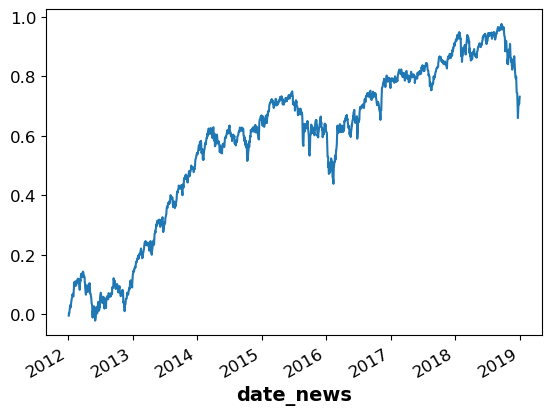

In [60]:
df_grouped.groupby(['date_news'])['ret'].mean().cumsum().plot()

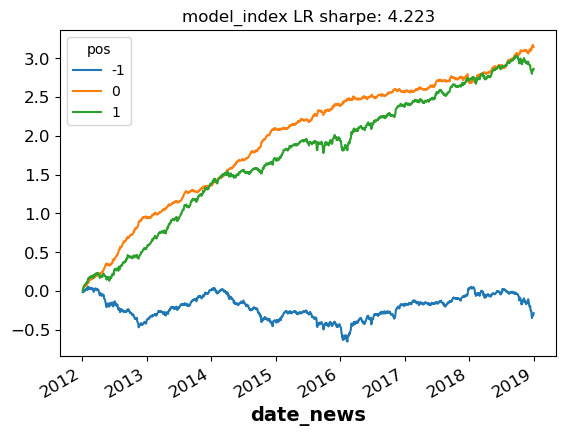

In [76]:
results = df_grouped
tresh = 0.2
results['pos'] = 1*(results['pct']>(1-tresh)) - (results['pct']<=tresh)*1
ret=results.groupby(['date_news','pos'])['ret'].mean().reset_index().pivot(columns='pos',index='date_news',values='ret')
ret[0] = ret[1]-ret[-1]
ret.cumsum().plot()
sh = np.sqrt(252)*(ret.mean()/ret.std()).round(3)
plt.title(f'model_index {"LR"} sharpe: {np.round(sh[0],3)}')
plt.show()

In [74]:
# index ret by [1, -1, 0]
ret_formated = ret[[1, -1, 0]]
sh_formated = np.sqrt(252)*(ret_formated.mean()/ret_formated.std()).round(3)
print("        ", "Long", "Short", "L-S", sep="\t")
print("Return: ", *list((252 * ret_formated.mean()).round(3)), sep="\t")
print("Std:    ", *list((np.sqrt(252)*ret_formated.std()).round(3)), sep="\t")
print("Sharpe: ", *list(sh_formated.round(3)), sep="\t")

        	Long	Short	L-S
Return: 	0.302	-0.122	0.423
Std:    	0.189	0.194	0.157
Sharpe: 	1.587	-0.619	2.699


In [63]:
ret_formated.mean()

pos
 1    0.001626
-1   -0.000161
 0    0.001787
dtype: float64

In [64]:
# index ret by [1, -1, 0]
ret_formated = ret[[1, -1, 0]]
sh_formated = np.sqrt(252)*(ret_formated.mean()/ret_formated.std()).round(3)
print("        ", "Long", "Short", "L-S", sep="\t")
print("Return: ", *list((252 * ret_formated.mean()).round(3)), sep="\t")
print("Std:    ", *list((np.sqrt(252)*ret_formated.std()).round(3)), sep="\t")
print("Sharpe: ", *list(sh_formated.round(3)), sep="\t")

        	Long	Short	L-S
Return: 	0.41	-0.041	0.45
Std:    	0.171	0.17	0.107
Sharpe: 	2.397	-0.238	4.223
